# Домашняя работа №1

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

x + 2*y + 3*z =  [5 7]


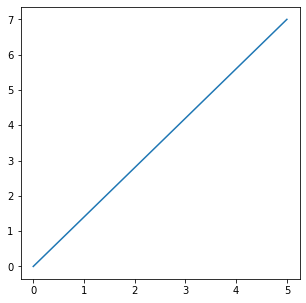

In [14]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])
S1 = x[0] + 2*y[0] + 3*z[0]
S2 = x[1] + 2*y[1] + 3*z[1]

fig = plt.figure(figsize=(5, 5))
ax = fig.gca()
S = np.array([S1, S2])
print('x + 2*y + 3*z = ', S)

# plt.scatter(S[0], S[1])
ax.plot([0,S[0]], [0,S[1]])
plt.show()

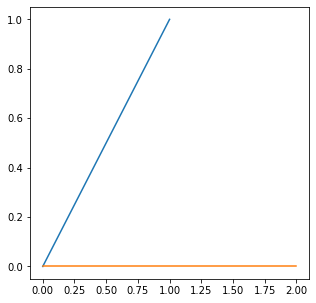

угол между векторами:  45.00000000000001 градусов


In [29]:
# Найдем угол между векторами x, y
x = np.array([1,1])
y = np.array([2, 0])

fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

ax.plot([0,x[0]], [0,x[1]])
ax.plot([0,y[0]], [0,y[1]])

plt.show()

from numpy.linalg import norm

xy_cosine = np.dot(x,y)/(norm(x)*norm(y))
angle = np.degrees(np.arccos(xy_cosine))

print('угол между векторами: ', angle, 'градусов')

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [46]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

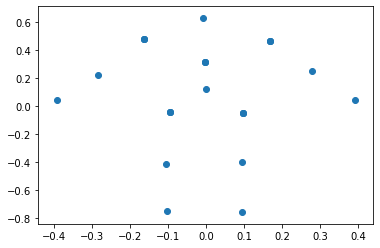

In [37]:
plt.scatter(df.x, df.y)

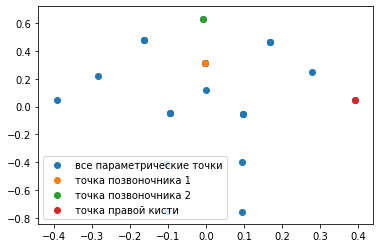

In [45]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все параметрические точки', 'точка позвоночника 1','точка позвоночника 2', 'точка правой кисти'])


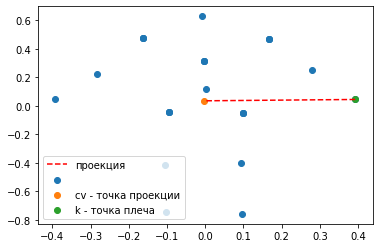

In [50]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор k - вектор кисти
k = np.array([df.x[16],df.y[16]])

# строим проекцию данной точки k на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(k,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([k[0],cv[0]],[k[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(k[0], k[1])
plt.legend(['проекция', '', 'cv - точка проекции', 'k - точка плеча'])

Расстояние от точки локтя до позвоночника - модуль вектора, образованного разностью двух точек: cv и k:

In [51]:
linalg.norm(cv - k)

0.3945363610739645

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [52]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [54]:
from numpy import linalg as LA

m1_vals, m1_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', m1_vecs)
print('Собственные значения: ', m1_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [55]:
m2_vals, m2_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', m2_vecs)
print('Собственные значения: ', m2_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
Собственные значения:  [3. 6. 3.]
